<a href="https://colab.research.google.com/github/fi-co/Distinguishing-AI-Generated-and-Human-Written-Scientific-Texts-/blob/main/SVM_classifier_(HLT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from typing_extensions import ClassVar
import matplotlib.pyplot as plt
import seaborn as sns

Model

In [ ]:

# Load the feature map

df = pd.read_csv('features.csv')


# Separate features and labels

X = df.drop(columns=['Label'])
y = df['Label']


# Split the data into trainig and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


# Initialize and train the Linear SVM

classifier = SVC(kernel='linear', C=0.1, random_state=12)
Classifier = classifier.fit(X_train, y_train)


# Make predictions on the test set

y_pred = Classifier.predict(X_test)


# Evaluate the model

print("Testing Results:\n")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Training set predictions for insights

y_train_pred = Classifier.predict(X_train)


# Evaluate training performance

print("\nTraining Results:\n")
print(classification_report(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Testing Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Accuracy: 1.0
Confusion Matrix:
 [[4 0]
 [0 6]]

Training Results:

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.86      1.00      0.93        19

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.94      0.93      0.92        40

Accuracy: 0.925
Confusion Matrix:
 [[18  3]
 [ 0 19]]


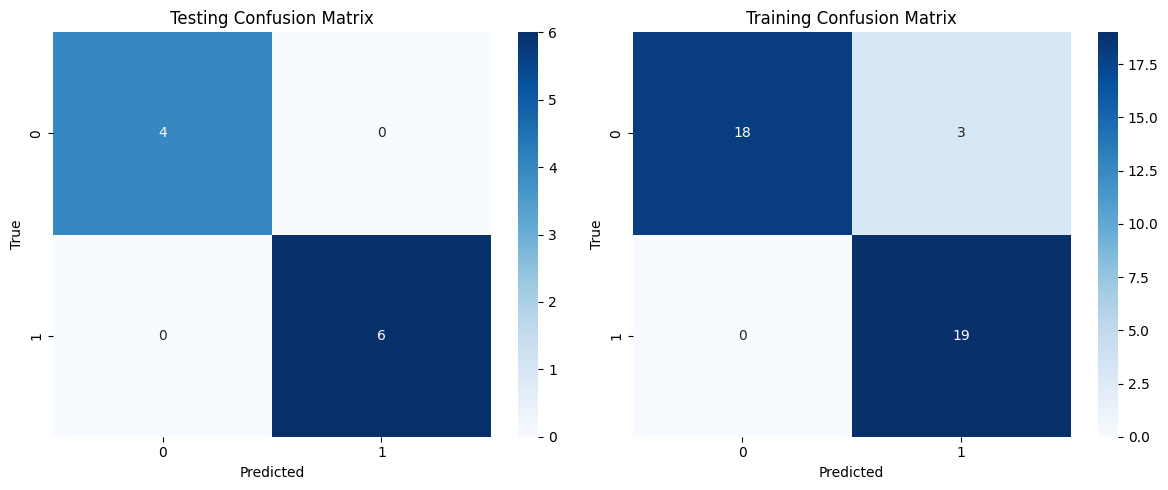

In [ ]:

# Save results to a file

with open('classification_results.txt', 'w') as f:
  f.write("Testing Results:\n")
  f.write(classification_report(y_test, y_pred))
  f.write(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
  f.write("Confusion Matrix:\n")
  f.write(str(confusion_matrix(y_test, y_pred)))
  f.write("\nTraining Results:\n")
  f.write(classification_report(y_train, y_train_pred))
  f.write(f"Accuracy: {accuracy_score(y_train, y_train_pred)}\n")
  f.write("Confusion Matrix:\n")
  f.write(str(confusion_matrix(y_train, y_train_pred)))


# Visualize confusion matrices

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()
